In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
results = pd.read_csv('../../source/out.txt')

In [32]:
da = np.zeros((20,12))
with open('../../source/out.txt') as f:
    f.readline()
    for i,line in enumerate(f):
        ba = line.split(',')
        da[i] =ba[16:28] # Up to 16 are hyperparameters, after 28 are energy states.  

In [36]:
df = pd.DataFrame(da,columns=list(results.columns[16:]))

In [37]:
df

,volatility_unhedged,correlation_unhedged,sharpe_unhedged,returns_unhedged,volatility_markethedged,correlation_markethedged,sharpe_markethedged,returns_markethedged,volatility_sphedged,correlation_sphedged,sharpe_sphedged,returns_sphedged
0,0.011360,0.924075,0.028499,-0.051316,0.003809,0.075330,-0.130734,0.092938,0.004407,0.105617,-0.045083,0.039425
1,0.012054,0.944995,0.005522,0.001163,0.004128,0.072448,-0.057747,0.046541,0.004037,0.155745,-0.111795,0.084873
2,0.011355,0.931473,0.024520,-0.042140,0.003836,0.064566,-0.028823,0.022502,0.004180,0.056730,-0.065835,0.053335
3,0.011105,0.911871,0.041964,-0.081181,0.003982,0.076479,-0.016016,0.013745,0.004559,0.155079,-0.013888,0.014125
4,0.011636,0.928485,0.056907,-0.121575,0.003621,0.084116,0.033834,-0.022632,0.004337,0.069834,0.030368,-0.023883
5,0.010136,0.933814,0.040863,-0.072526,0.003395,0.035869,0.024586,-0.015111,0.003630,0.143614,-0.011121,0.009022
6,0.011881,0.916876,0.029736,-0.056094,0.004422,0.116958,-0.010995,0.011208,0.004873,0.030944,-0.037252,0.036642
7,0.011967,0.899129,0.052830,-0.114266,0.004628,0.069000,0.014196,-0.010674,0.005247,0.047567,0.016975,-0.014642
8,0.011096,0.924201,0.046631,-0.091960,0.004251,0.143285,-0.004437,0.005370,0.004271,0.002552,-0.015683,0.014580
9,0.012070,0.889089,0.052030,-0.113093,0.004564,0.036530,0.034180,-0.028503,0.005586,0.083313,0.013269,-0.011370


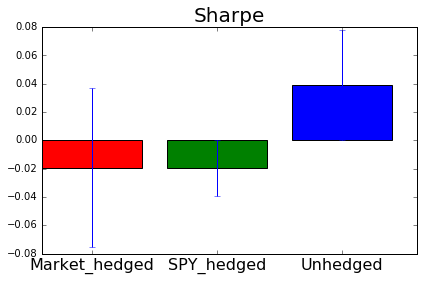

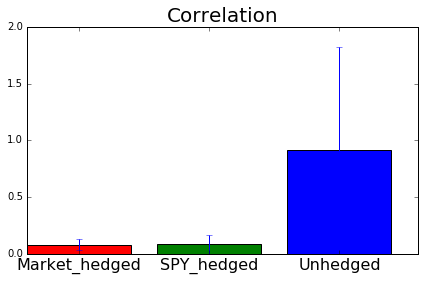

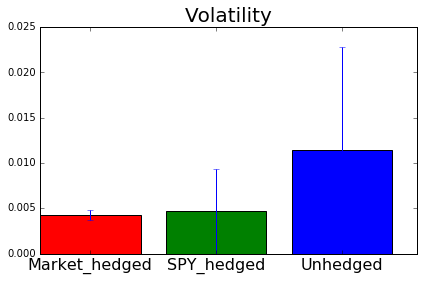

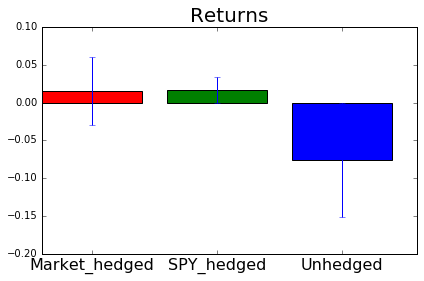

In [51]:
for metric in ['sharpe','correlation','volatility','returns']:
    market_hedged = df[metric+'_markethedged']
    spy_hedged = df[metric+'_sphedged']
    unhedged = df[metric+'_unhedged']
    
    market_mean = np.mean(market_hedged)
    spy_mean = np.mean(spy_hedged)
    un_mean = np.mean(unhedged)

    market_std = np.std(market_hedged)
    spy_std = np.mean(spy_hedged)
    un_std = np.mean(unhedged)


    
    plt.bar([0,1,2],[market_mean, spy_mean, un_mean], color=['r','g','b'],yerr=[market_std,spy_std,un_std])
    plt.xticks(np.array([0,1,2]) + 0.4, ('Market_hedged', 'SPY_hedged', 'Unhedged'), fontsize = 16)

    plt.title(metric.capitalize(), fontsize=20)
    plt.tight_layout()
    plt.show()